In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

X = iris.data

Y = iris.target

In [4]:
from sklearn.svm import SVC

In [5]:
model = SVC()

In [7]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [25]:
model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
from sklearn import metrics

In [27]:
predicted = model.predict(X_test)

In [28]:
print(metrics.accuracy_score(Y_test,predicted))

0.9736842105263158


In [30]:
from sklearn import svm

In [99]:
X = iris.data[:,:2]

Y = iris.target


In [83]:
C = 1.0

In [108]:
svc = svm.SVC(kernel = 'linear',C=C).fit(X,Y)
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [85]:
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)

In [86]:
poly_svc = svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)

In [87]:
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [88]:
x_min = X[:,0].min()-1
x_max = X[:,0].max()+1

In [89]:
y_min = X[:,1].min()-1
y_max = X[:,1].max()+1

In [113]:
h = 0.02
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
xx.ravel()

array([3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88])

In [123]:
xx

array([[3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       ...,
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88]])

In [114]:
yy.ravel()

array([1.  , 1.  , 1.  , ..., 5.38, 5.38, 5.38])

In [116]:
np.c_[xx.ravel(),yy.ravel()]

array([[3.3 , 1.  ],
       [3.32, 1.  ],
       [3.34, 1.  ],
       ...,
       [8.84, 5.38],
       [8.86, 5.38],
       [8.88, 5.38]])

In [122]:
Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

In [104]:
titles = ['SVC with linear kernel',
         'LinearSVC (liner kernel)',
         'SVC with RBF kernel',
         'SVC with polynomial(degree 3) kernel']

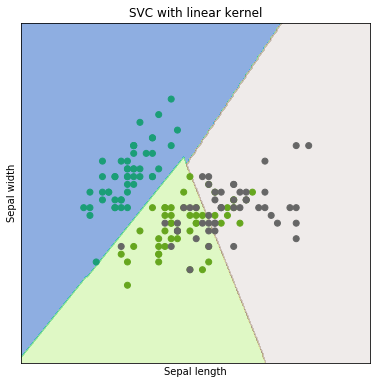

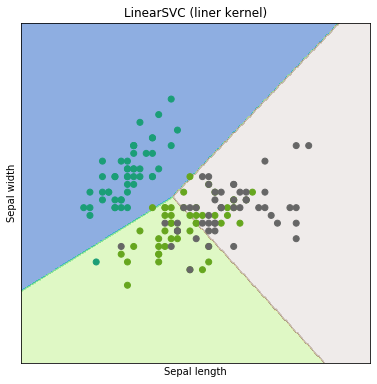

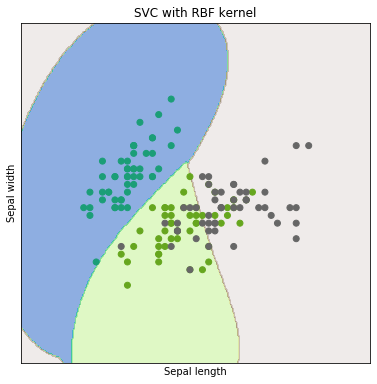

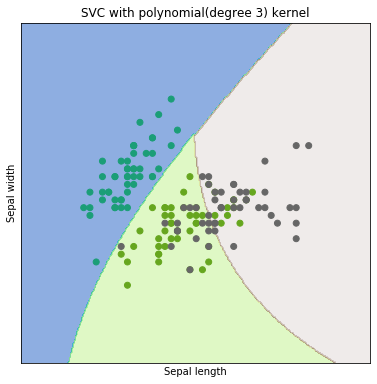

In [125]:
for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    
    plt.figure(figsize=(15,15))
    
    plt.subplot(2,2,i+1)
    
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain, alpha=0.5)
    
    plt.scatter(X[:,0],X[:,1],c=Y,cmap =plt.cm.Dark2)
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])